# 航空公司客户价值分析

## 实验目的：<br>
借助航空公司客户数据，对客户进行分类。<br>
对不同的客户类别进行特征分析，比较不同类别客户的客户价值。<br>
对不同价值的客户类别提供个性化服务，制定相应的营销策略。<br>

### 读取数据，指定编码为gb18030

In [4]:
import numpy as np
import pandas as pd
airline_data = pd.read_csv("data/air_data.csv",encoding="gb18030") #导入航空数据
print('原始数据的形状为：',airline_data.shape)

原始数据的形状为： (62988, 44)


<img src='data/data1.png'>

<img src='data/data2.png'>

### 数据描述性分析

In [5]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 44 columns):
MEMBER_NO                  62988 non-null int64
FFP_DATE                   62988 non-null object
FIRST_FLIGHT_DATE          62988 non-null object
GENDER                     62985 non-null object
FFP_TIER                   62988 non-null int64
WORK_CITY                  60719 non-null object
WORK_PROVINCE              59740 non-null object
WORK_COUNTRY               62962 non-null object
AGE                        62568 non-null float64
LOAD_TIME                  62988 non-null object
FLIGHT_COUNT               62988 non-null int64
BP_SUM                     62988 non-null int64
EP_SUM_YR_1                62988 non-null int64
EP_SUM_YR_2                62988 non-null int64
SUM_YR_1                   62437 non-null float64
SUM_YR_2                   62850 non-null float64
SEG_KM_SUM                 62988 non-null int64
WEIGHTED_SEG_KM            62988 non-null float64
LAST_FLIGHT_

In [6]:
airline_data.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,EP_SUM_YR_1,EP_SUM_YR_2,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62988.0,62988.000000,62437.000000,62850.000000,62988.000000,...,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,0.0,265.689623,5355.376064,5604.026014,17123.878691,...,1355.006223,1620.695847,1080.378882,12545.7771,6638.739585,0.486419,0.513581,0.522293,0.468422,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,0.0,1645.702854,8109.450147,8703.364247,20960.844623,...,7868.477000,8294.398955,5639.857254,20507.8167,12601.819863,0.319105,0.319105,0.339632,0.338956,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,368.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,0.0,0.000000,1003.000000,780.000000,4747.000000,...,0.000000,0.000000,0.000000,2775.0000,700.000000,0.250000,0.288889,0.258150,0.167954,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,0.0,0.000000,2800.000000,2773.000000,9994.000000,...,0.000000,0.000000,0.000000,6328.5000,2860.500000,0.500000,0.500000,0.514252,0.476747,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,0.0,0.000000,6574.000000,6845.750000,21271.250000,...,0.000000,345.000000,0.000000,14302.5000,7500.000000,0.711111,0.750000,0.815091,0.728375,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,0.0,74460.000000,239560.000000,234188.000000,580717.000000,...,984938.000000,984938.000000,728282.000000,985572.0000,728282.000000,1.000000,1.000000,0.999989,0.999993,140.000000


In [7]:
airline_data.head(10)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39
5,56972,2008/2/10,2009/9/29,男,6,广州,广东,CN,64.0,2014/3/31,...,2460,29783,29783,343121,152538,0.456522,0.543478,0.608233,0.391764,15
6,44924,2006/3/22,2006/3/29,男,6,乌鲁木齐市,新疆,CN,46.0,2014/3/31,...,12320,50009,50009,298873,175673,0.504950,0.495050,0.495048,0.504948,29
7,22631,2010/4/9,2010/4/9,女,6,温州市,浙江,CN,50.0,2014/3/31,...,9500,49334,49334,351198,193601,0.589041,0.410959,0.522078,0.477919,14
8,32197,2011/6/7,2011/7/1,男,5,DRANCY,NaN,FR,50.0,2014/3/31,...,500,32200,32200,295158,168028,0.410714,0.589286,0.483459,0.516537,7
9,31645,2010/7/5,2010/7/5,女,6,温州,浙江,CN,43.0,2014/3/31,...,0,47052,47052,251907,143958,0.390625,0.609375,0.526951,0.473044,16


### 数据预处理<br>
#### 1. 去除票价为空的数据


In [7]:
exp1 = airline_data["SUM_YR_1"].notnull()
exp2 = airline_data["SUM_YR_2"].notnull()
exp = exp1 & exp2
airline_notnull = airline_data.loc[exp,:]
print('删除缺失记录后数据的形状为：',airline_notnull.shape)

删除缺失记录后数据的形状为： (62299, 44)


#### 2.只保留票价不为0，平均折扣率不为0，总飞行公里数大于0的记录。

In [8]:
# 只保留票价非零的，或者平均折扣率不为0且总飞行公里数大于0的记录。
index1 = airline_notnull['SUM_YR_1'] != 0
index2 = airline_notnull['SUM_YR_2'] != 0
index3 = (airline_notnull['SEG_KM_SUM']> 0) & (airline_notnull['avg_discount'] != 0)
airline = airline_notnull[(index1 | index2) & index3]
print('删除异常记录后数据的形状为：',airline.shape)

删除异常记录后数据的形状为： (62044, 44)


### 构建特征

<img src='data/1.jpg'>

L: LOAD_TIME  观测窗口的结束时间----FFP_DATE	入会时间<br>
R: LAST_TO_END  最后一次乘机时间至观测窗口结束时长<br>
F: FLIGHT_COUNT 观测窗口内的飞行次数 <br>
M: SEG_KM_SUM 观测窗口的总飞行公里数 <br>
C: avg_discount 平均折扣率<br>


In [9]:
## 选取需求特征
airline_selection = airline[["FFP_DATE","LOAD_TIME","LAST_TO_END","FLIGHT_COUNT","SEG_KM_SUM","avg_discount"]] 
airline_selection.head()
## 构建L特征
L= pd.to_datetime(airline_selection["LOAD_TIME"]) - pd.to_datetime(airline_selection["FFP_DATE"])
L = L.astype("str").str.split().str[0]
# L
L = L.astype("int")/30
L
## 合并特征
airline_features = pd.concat([L,airline_selection.iloc[:,2:]],axis = 1)
print('构建的LRFMC特征前5行为：\n',airline_features.head())

构建的LRFMC特征前5行为：
            0  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
0  90.200000            1           210      580717      0.961639
1  86.566667            7           140      293678      1.252314
2  87.166667           11           135      283712      1.254676
3  68.233333           97            23      281336      1.090870
4  60.533333            5           152      309928      0.970658


In [10]:
airline_features=airline_features.rename(columns={0:'L'})
airline_features.head()

,L,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,90.200000,1,210,580717,0.961639
1,86.566667,7,140,293678,1.252314
2,87.166667,11,135,283712,1.254676
3,68.233333,97,23,281336,1.090870
4,60.533333,5,152,309928,0.970658


In [11]:
airline_features.describe()

,L,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
count,62044.000000,62044.000000,62044.000000,62044.000000,62044.000000
mean,49.623036,172.532703,11.971359,17321.694749,0.722180
std,28.262697,181.526164,14.110619,21052.728111,0.184833
min,12.166667,1.000000,2.000000,368.000000,0.136017
25%,24.500000,29.000000,3.000000,4874.000000,0.613085
50%,42.600000,105.000000,7.000000,10200.000000,0.712162
75%,72.733333,260.000000,15.000000,21522.500000,0.809293
max,114.566667,731.000000,213.000000,580717.000000,1.500000


### 数据标准化处理

In [12]:
# 标准差标准化 airline_features_scaled
airline_features_scaled= (airline_features - airline_features.mean()) / (airline_features.std())
airline_features_scaled.head()

,L,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,1.435707,-0.944948,14.034016,26.761154,1.295540
1,1.307152,-0.911894,9.073213,13.126864,2.868176
2,1.328381,-0.889859,8.718869,12.653481,2.880950
3,0.658476,-0.416098,0.781585,12.540622,1.994714
4,0.386032,-0.922912,9.923636,13.898736,1.344335


In [27]:
# from sklearn.preprocessing import StandardScaler
# airline_features_scaled = StandardScaler().fit_transform(airline_features)
# np.savez('../data/airline_features_scaled.npz',data)
# print('标准化后LRFMC五个特征为：\n',data[:5,:])

### 使用k均值构建模型

In [17]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans #导入kmeans算法
# airline_features_scaled = np.load('../data/airline_features_scaled.npz')['arr_0']
k = 5 ## 确定聚类中心数
#构建模型
kmeans_model = KMeans(n_clusters = k,random_state=123)
fit_kmeans = kmeans_model.fit(airline_features_scaled)   #模型训练
#统计不同类别样本的数目
r1 = pd.Series(kmeans_model.labels_).value_counts()
print('最终每个类别的数目为：\n',r1)
# kmeans_model.labels_[:20] #查看样本的类别标签
kmeans_model.cluster_centers_ #查看聚类中心


最终每个类别的数目为：
 2    24661
0    15741
3    12125
1     5336
4     4181
dtype: int64


array([[ 1.16063114, -0.37723101, -0.08693538, -0.09485761, -0.15582812],
       [ 0.48332845, -0.79938326,  2.4832016 ,  2.42472391,  0.30863003],
       [-0.70022909, -0.41487223, -0.16115608, -0.16097537, -0.25507251],
       [-0.31357211,  1.68622472, -0.57397357, -0.53680287, -0.17306867],
       [ 0.05189162, -0.00324595, -0.22666647, -0.23105177,  2.19223968]])

     num     ratio
2  24661  0.397476
0  15741  0.253707
3  12125  0.195426
1   5336  0.086003
4   4181  0.067388


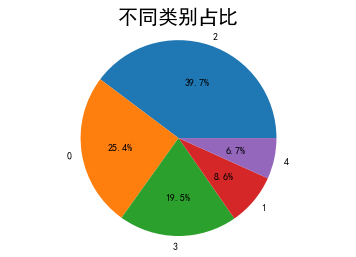

In [35]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

r=pd.DataFrame(r1,columns=["num"])
r['ratio']=r['num']/r['num'].sum()
print(r)
plt.pie(r['ratio'],labels=r.index,autopct = '%3.1f%%')
plt.title("不同类别占比",fontsize=20)
plt.axis('equal')
plt.show()

### 分析聚类结果

<img src='data/data3.png'>
<img src='data/data6.png'>
<img src='data/data4.png'>
<img src='data/data5.png'>